In [42]:
import pandas as pd
import scipy as sci
import numpy as np
import matplotlib.pyplot as plt
from scipy import io, signal

In [2]:
eegF1_df = pd.read_json('file:eegData_F1.json')
eegM1_df = pd.read_json('file:eegData_M1.json')
eventF1_df = pd.read_json('file:EventJson_F1.json')
eventM1_df = pd.read_json('file:EventJson_M1.json')
accelF1_df = pd.read_json('file:accelerometerJson_F1.json')
accelM1_df = pd.read_json('file:accelerometerJson_M1.json')
fs = 256

In [3]:
def process_eeg_dataframe(df):
    df_raw_time_vector = df[df['electrode'] == 0]['timestamp'].to_numpy()
    time_spacing = []
    
    for i in np.arange(1,len(df_raw_time_vector)):
        time_spacing.append(df_raw_time_vector[i]-df_raw_time_vector[i-1])

        if(i>1):
            if(not time_spacing[i-1] == time_spacing[i-2]):
                print(time_spacing[i-1],time_spacing[i-2])
                
    T = df_raw_time_vector[-1] - df_raw_time_vector[0]
    T = T / np.timedelta64(1, 's')
    print('length: ',T,' seconds')
    dt = time_spacing[0]
    dt = dt / np.timedelta64(1, 's')
    print('sample spacing: ',dt,' seconds')

    time_vector = np.arange(0,len(F1_eeg[0])/fs,1/fs)
    
    channel_list = []
    eeg_channels = []
    for channel in np.arange(5):
        channel_list.append(df[df['electrode'] == channel])
        eeg_temp = channel_list[channel]['samples'].tolist()
        eeg = []
        for a in eeg_temp:
            for b in a:
                eeg.append(b)
        eeg_channels.append(np.array(eeg))
        print('shape of channel ',channel,': ',eeg_channels[channel].shape)
    eeg_channels = np.array(eeg_channels).squeeze()
    return time_vector,eeg_channels,T

In [50]:
F1_time_vector,F1_eeg,F1_T = process_eeg_dataframe(eegF1_df)
F2_time_vector,F2_eeg,M1_T = process_eeg_dataframe(eegF1_df)
fs = 256
print(12/256)
print(len(F1_eeg[0])/256  - 12/256)

length:  296.390625  seconds
sample spacing:  0.046875  seconds
shape of channel  0 :  (75888,)
shape of channel  1 :  (75888,)
shape of channel  2 :  (75888,)
shape of channel  3 :  (75888,)
shape of channel  4 :  (75888,)
length:  296.390625  seconds
sample spacing:  0.046875  seconds
shape of channel  0 :  (75888,)
shape of channel  1 :  (75888,)
shape of channel  2 :  (75888,)
shape of channel  3 :  (75888,)
shape of channel  4 :  (75888,)
0.046875
296.390625


In [27]:
def process_event_dataframe(df,start_time):
    data = df.to_numpy()
    for i in np.arange(len(data)):
        data[i,0] = (data[i,0] - start_time)
    return data

In [28]:
def first_timestamp(df):
    timestamp = df['timestamp'][0]
    return timestamp

In [29]:
print(first_timestamp(eegF1_df))
print(first_timestamp(eventF1_df))
print(first_timestamp(eventF1_df)-first_timestamp(eegF1_df))

2019-07-25 22:40:11.708375
2019-07-25 22:50:22.979000
0 days 00:10:11.270625


In [34]:
F1_eeg[0]

array([20.99609375,  5.859375  ,  6.8359375 , ..., 19.04296875,
       24.4140625 , 21.97265625])

In [31]:
F1_T


296.390625

In [32]:
F1_time_vector

array([0.00000000e+00, 4.68750000e-02, 9.37500000e-02, ...,
       2.96250000e+02, 2.96296875e+02, 2.96343750e+02])

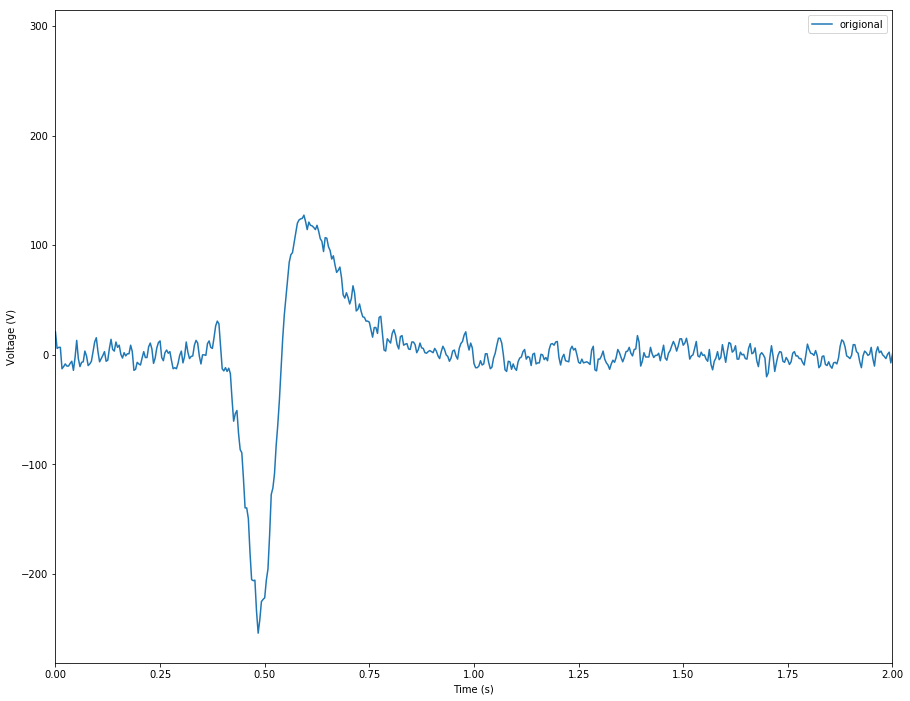

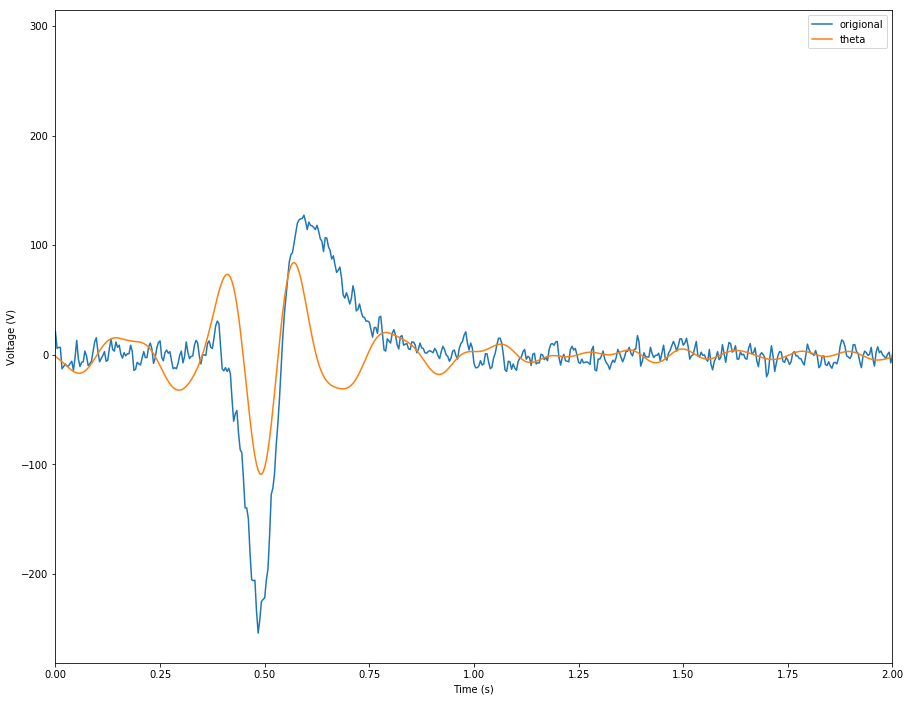

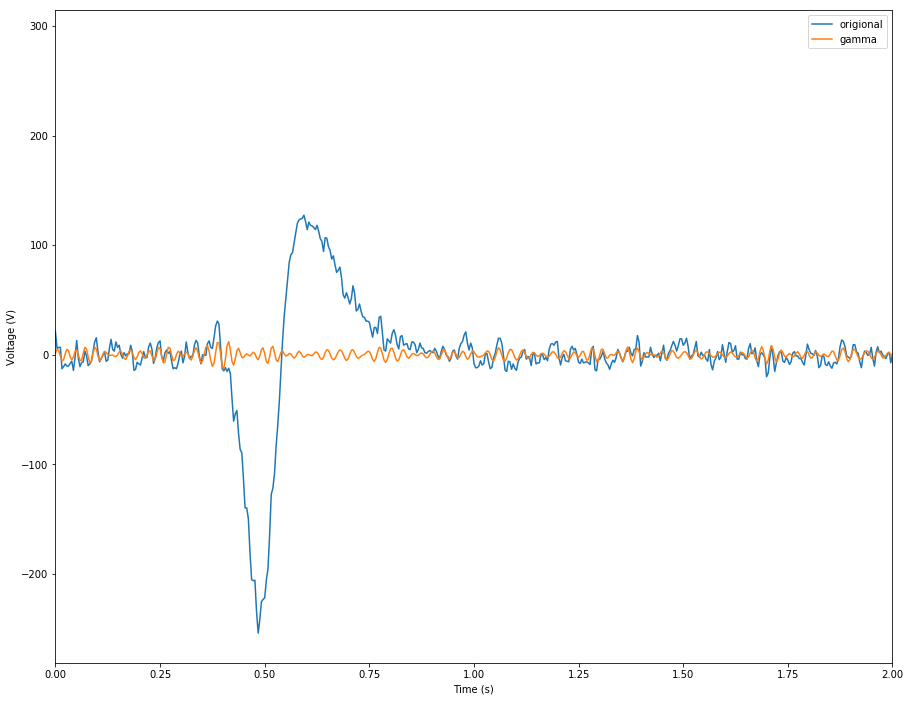

In [57]:
FIR_theta = signal.firwin(751, cutoff=(4,10), fs=fs, pass_zero=False)
theta_osc = np.empty(F1_eeg.shape)
theta_osc[0] = np.convolve(F1_eeg[0], FIR_theta, mode='same')
theta_osc[1] = np.convolve(F1_eeg[2], FIR_theta, mode='same')
theta_osc[2] = np.convolve(F1_eeg[2], FIR_theta, mode='same')
theta_osc[3] = np.convolve(F1_eeg[3], FIR_theta, mode='same')
theta_osc[4] = np.convolve(F1_eeg[4], FIR_theta, mode='same')

FIR_gamma = signal.firwin(251, cutoff=(30,50), fs=fs, pass_zero=False)
gamma_osc =  np.empty(F1_eeg.shape)
gamma_osc[0] = np.convolve(F1_eeg[0], FIR_gamma, mode='same')
gamma_osc[1] = np.convolve(F1_eeg[2], FIR_gamma, mode='same')
gamma_osc[2] = np.convolve(F1_eeg[2], FIR_gamma, mode='same')
gamma_osc[3] = np.convolve(F1_eeg[3], FIR_gamma, mode='same')
gamma_osc[4] = np.convolve(F1_eeg[4], FIR_gamma, mode='same')

t_vector = np.arange(0,len(F1_eeg[0])/fs,1/fs)

plt.figure(figsize=(15,12))
# plot the signal and the filtered signal
plt.plot(t_vector, F1_eeg[0], '-', label = "origional")
plt.plot(t_vector, theta_osc[0], '-', label = "theta")
plt.xlim([0,2])
plt.xlabel('Time (s)'); plt.ylabel('Voltage (V)');
plt.legend()

plt.figure(figsize=(15,12))
# plot the signal and the filtered signal
plt.plot(t_vector, F1_eeg[0], '-', label = "origional")
plt.plot(t_vector, gamma_osc[0], '-', label = "gamma")
plt.xlim([0,2])
plt.xlabel('Time (s)'); plt.ylabel('Voltage (V)');
plt.legend()

